### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [4]:
# Load Dataset and first view
df = pd.read_csv("https://raw.githubusercontent.com/devgupta2619/IRIS_FLOWER_CLASSIFICATION/refs/heads/main/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Understanding The Data



In [5]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable.

In [7]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


### Data Wrangling Code

In [8]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [9]:
# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##  Data Vizualization - Understand the relationships between variables

#### Chart - 1 : Distribution of Numerical Variables

In [10]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

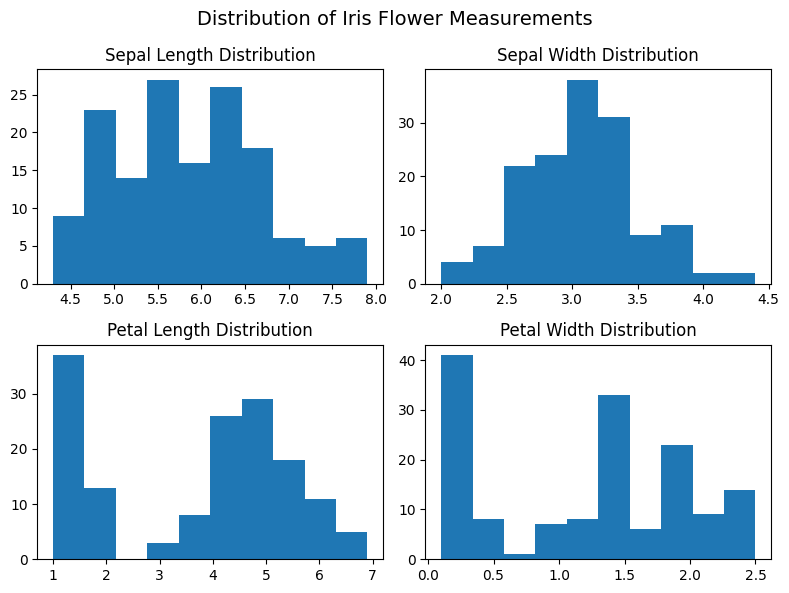

In [11]:
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()
plt.show()

#### Chart - 2 : Sepal Length vs Sepal Width

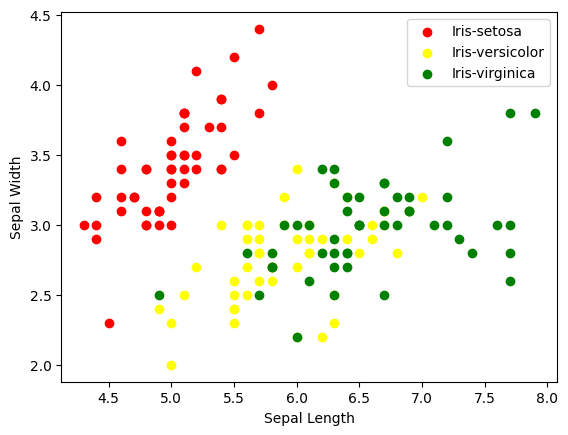

In [12]:
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])


plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 3 : Petal Length vs Petal Width

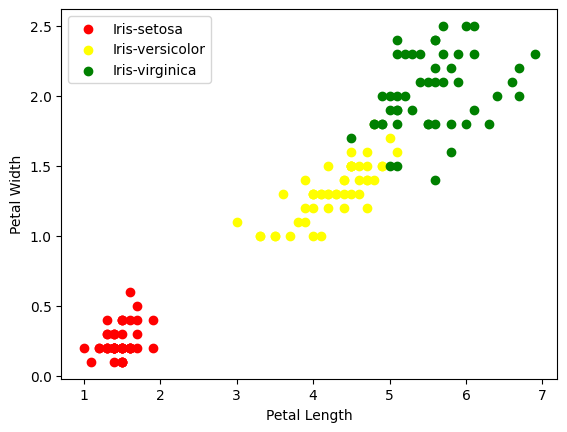

In [13]:
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):

    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 4 : Sepal Length vs Petal Length

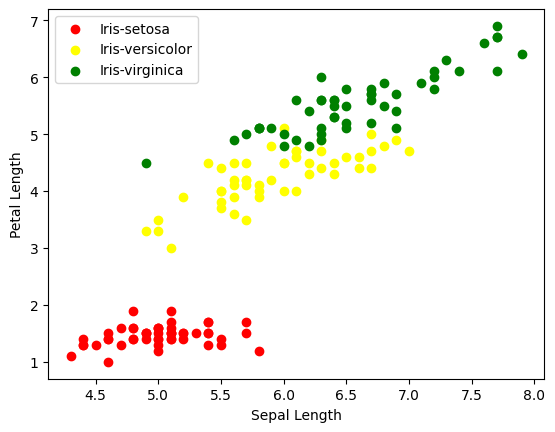

In [14]:
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):

    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 5 : Sepal Width vs Petal Width

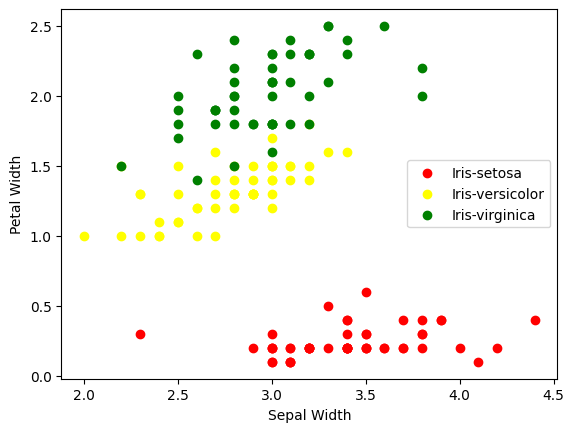

In [15]:
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):

    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])


plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Display the scatter plot.
plt.show()

##  Feature Engineering & Data Pre-processing

### 1. Categorical Encoding

In [16]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


### 2. Data Scaling

In [17]:
# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

### 3. Data Splitting

In [18]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [19]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Species,
0,37
2,36
1,32


##  ML Model Implementation

In [20]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [21]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

### ML Model 1: Naive Bayes

In [22]:
# ML Model - 1 Implementation
nb_model = GaussianNB()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


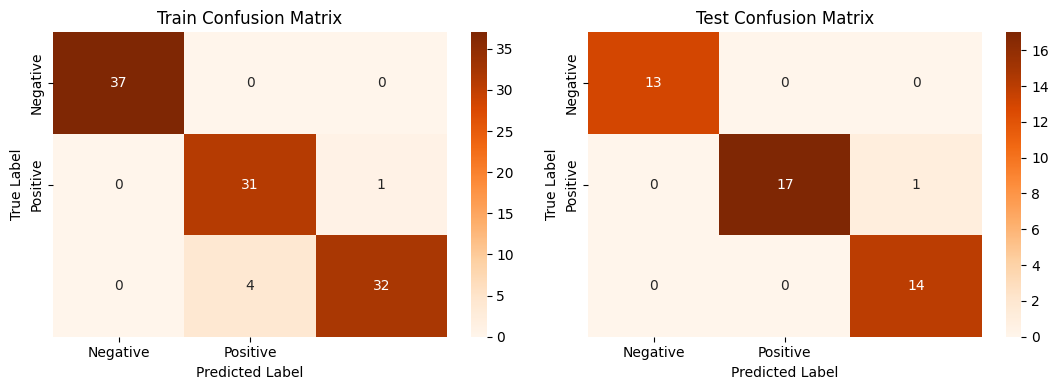


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.885714 | 0.96875  |   0.925373 |  32        |
| 2            |    0.969697 | 0.888889 |   0.927536 |  36        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.951804 | 0.952546 |   0.95097  | 105        |
| weighted avg |    0.95478  | 0.952381 |   0.952412 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [23]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [24]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Naive Bayes
Precision Train,0.954780
Precision Test,0.979259
Recall Train,0.952381
Recall Test,0.977778
Accuracy Train,0.952381
Accuracy Test,0.977778
F1 macro Train,0.952412
F1 macro Test,0.977843


#### 2. Cross- Validation & Hyperparameter Tuning

In [25]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.01873817422860384}


In [26]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


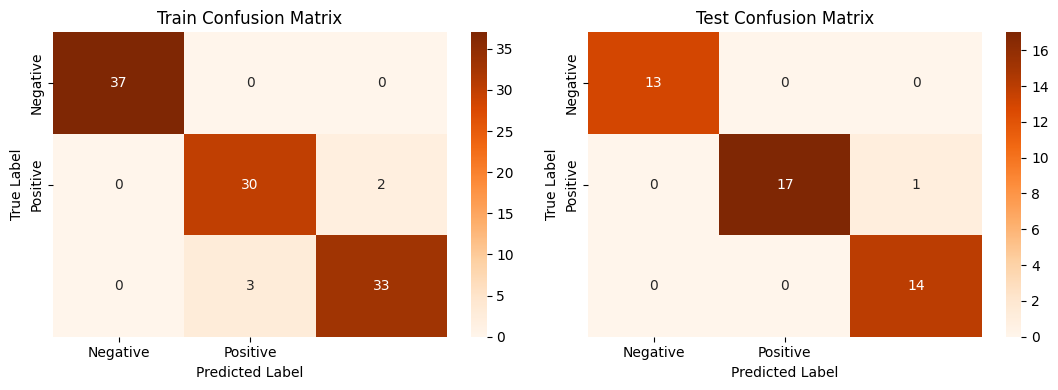


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.909091 | 0.9375   |   0.923077 |  32        |
| 2            |    0.942857 | 0.916667 |   0.929577 |  36        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.950649 | 0.951389 |   0.950885 | 105        |
| weighted avg |    0.952703 | 0.952381 |   0.952412 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [27]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [28]:
score['Naive Bayes tuned']= nb2_score

In [29]:
# Updated Evaluation metric Score Chart
score

,Naive Bayes,Naive Bayes tuned
Precision Train,0.954780,0.952703
Precision Test,0.979259,0.979259
Recall Train,0.952381,0.952381
Recall Test,0.977778,0.977778
Accuracy Train,0.952381,0.952381
Accuracy Test,0.977778,0.977778
F1 macro Train,0.952412,0.952412
F1 macro Test,0.977843,0.977843


It appears that hyperparameter tuning did not improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has precision, recall, accuracy and F1 score on the test set as same as in the untuned Naive Bayes model.

### ML Model 2 : Neural Network

In [30]:
# ML Model - 2Implementation
nn_model = MLPClassifier(random_state=0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


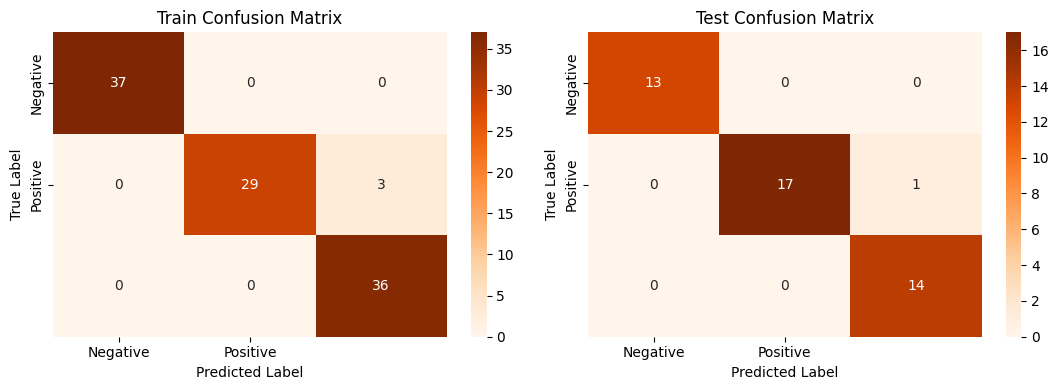


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    1        | 0.90625  |   0.95082  |  32        |
| 2            |    0.923077 | 1        |   0.96     |  36        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.974359 | 0.96875  |   0.970273 | 105        |
| weighted avg |    0.973626 | 0.971429 |   0.971297 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [31]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [32]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.954780,0.952703,0.973626
Precision Test,0.979259,0.979259,0.979259
Recall Train,0.952381,0.952381,0.971429
Recall Test,0.977778,0.977778,0.977778
Accuracy Train,0.952381,0.952381,0.971429
Accuracy Test,0.977778,0.977778,0.977778
F1 macro Train,0.952412,0.952412,0.971297
F1 macro Test,0.977843,0.977843,0.977843


#### 2. Cross- Validation & Hyperparameter Tuning

In [33]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 60, 'alpha': 0.00030000000000000003}


In [34]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


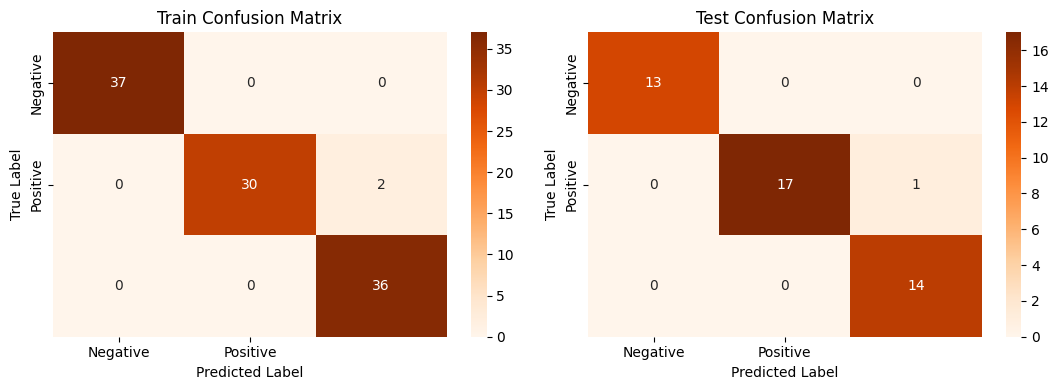


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    1        | 0.9375   |   0.967742 |  32        |
| 2            |    0.947368 | 1        |   0.972973 |  36        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.982456 | 0.979167 |   0.980238 | 105        |
| weighted avg |    0.981955 | 0.980952 |   0.980903 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    1        | 0.944444 |   0.971429 | 18        |
| 2            |    0.933333 | 1        |   0.965517 | 14        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [35]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [36]:
score['Neural Network tuned']= neural2_score

In [37]:
# Updated Evaluation metric Score Chart
score

,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.954780,0.952703,0.973626,0.981955
Precision Test,0.979259,0.979259,0.979259,0.979259
Recall Train,0.952381,0.952381,0.971429,0.980952
Recall Test,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.952381,0.952381,0.971429,0.980952
Accuracy Test,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.952412,0.952412,0.971297,0.980903
F1 macro Test,0.977843,0.977843,0.977843,0.977843


It appears that hyperparameter tuning improve the performance of the neural network model on the test set. The precision, recall, accuracy and F1 scores on the test set are increased for the tuned neural network model compare to untuned neural network model.

In [38]:
print(score.to_markdown())

|                 |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |      0.95478  |            0.952703 |         0.973626 |               0.981955 |
| Precision Test  |      0.979259 |            0.979259 |         0.979259 |               0.979259 |
| Recall Train    |      0.952381 |            0.952381 |         0.971429 |               0.980952 |
| Recall Test     |      0.977778 |            0.977778 |         0.977778 |               0.977778 |
| Accuracy Train  |      0.952381 |            0.952381 |         0.971429 |               0.980952 |
| Accuracy Test   |      0.977778 |            0.977778 |         0.977778 |               0.977778 |
| F1 macro Train  |      0.952412 |            0.952412 |         0.971297 |               0.980903 |
| F1 macro Test   |      0.977843 |            0.977843 |         0.977843 |      

## ***Selection of best model***

In [39]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Naive Bayes,0.954780,0.979259,0.952381,0.977778,0.952381,0.977778,0.952412,0.977843
Naive Bayes tuned,0.952703,0.979259,0.952381,0.977778,0.952381,0.977778,0.952412,0.977843
Neural Network,0.973626,0.979259,0.971429,0.977778,0.971429,0.977778,0.971297,0.977843


In [40]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [41]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes - 0.9793
Recall: Naive Bayes - 0.9778
Accuracy: Naive Bayes - 0.9778
F1 macro: Naive Bayes - 0.9778


In [42]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Naive Bayes            |       0.952381 |      0.977778 |
| Naive Bayes tuned      |       0.952381 |      0.977778 |
| Neural Network         |       0.971429 |      0.977778 |
